In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
con = sqlite3.connect(r'C:\Users\ukwun\Documents\DS_Projects/zomato_rawdata.sqlite')

In [52]:
df = pd.read_sql_query("SELECT * FROM USERS", con)

## ...Data Preprocessing...

In [53]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [54]:
df.shape

(51717, 18)

In [55]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [56]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [57]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
## fix formatting issues

In [58]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [59]:
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = df['rate'].astype(str)
df['rate'].replace(['NEW', 'None', '-'], np.nan, inplace=True)

In [60]:
df['rate'] = df['rate'].astype(float)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [61]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [62]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',' , '')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [63]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [64]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


## ...Exploratory Data Analysis...

In [65]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [67]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 1200x800 with 0 Axes>

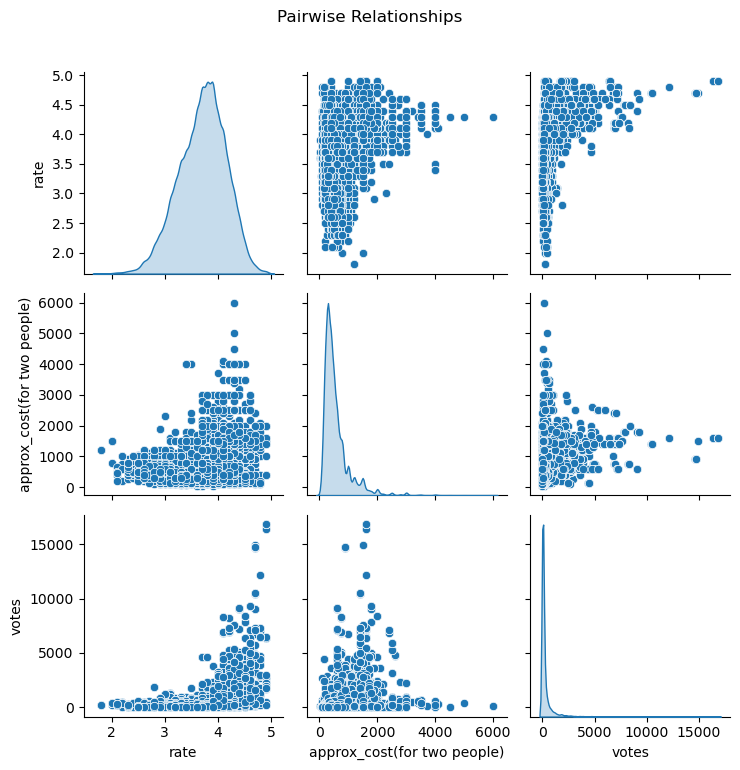

In [69]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['rate', 'approx_cost(for two people)', 'votes']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.show()

In [89]:
correlation_matrix = df[['rate', 'approx_cost(for two people)', 'votes']].corr()
print(correlation_matrix)

                                 rate  approx_cost(for two people)     votes
rate                         1.000000                     0.385183  0.434040
approx_cost(for two people)  0.385183                     1.000000  0.381804
votes                        0.434040                     0.381804  1.000000


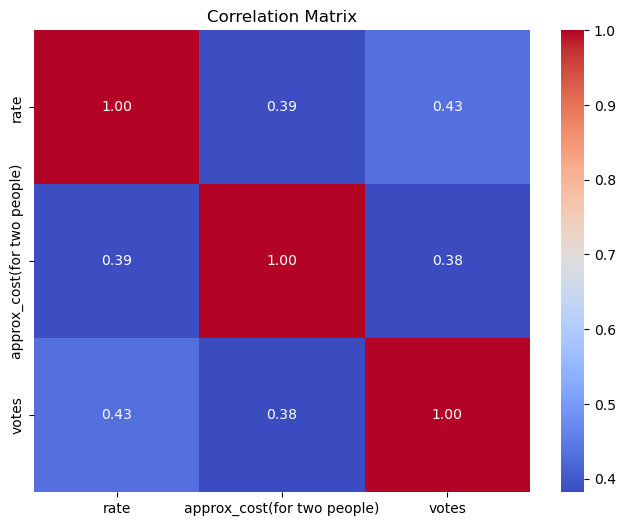

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Analysing restaurant with frequently ordered dishes

In [75]:
import wordcloud
from wordcloud import WordCloud

In [70]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [72]:
data = df.dropna(subset=['rest_type'])
data.shape

(51490, 18)

In [73]:
# most liked dishes in Quick Bites
data_qb = data[data['rest_type'].str.contains('Quick Bites')]
data_qb['dish_liked']
data_qb['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [74]:
all_dishes_qb = data_qb['dish_liked'].str.lower().str.cat()

(-0.5, 799.5, 399.5, -0.5)

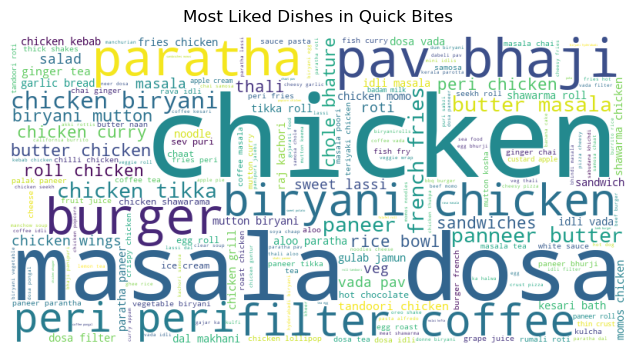

In [94]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_dishes_qb)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud)
plt.title('Most Liked Dishes in Quick Bites', y=1.02)
plt.axis('off')

In [ ]:
# most liked dishes in all the restaurants

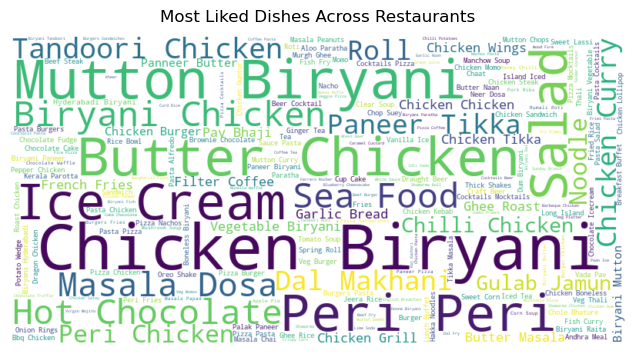

In [95]:
text = ' '.join(df['dish_liked'][df['dish_liked'] != 'None'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Liked Dishes Across Restaurants', y=1.02)
plt.axis('off')
plt.show()

## ...Handling Missing Values...

In [102]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                         0
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [98]:
import ast

In [96]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [97]:
df[['rate' , 'reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [99]:
df[df['rate'].isnull()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [103]:
# Extract rating from the 'reviews_list'

def get_Rate(x):
    list_of_reviews = ast.literal_eval(x)
    
    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None
    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated' , '').strip() for i in first_input][0])
        return rate

In [104]:
df['rate_from_reviews_list'] = df['reviews_list'].apply(get_Rate)
df['rate_from_reviews_list']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: rate_from_reviews_list, Length: 51717, dtype: float64

In [105]:
# fill nan

nan_index = df[df['rate'].isnull()].index 

for index in nan_index:
    df['rate'][index] = df['rate_from_reviews_list'][index]

In [107]:
df['rate'].isnull().sum()

8542

In [111]:
dataframe = df.drop(['dish_liked' , 'rate_from_reviews_list'] , axis=1)
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


## ...Feature Engineering...

#### Extracting interesting features

In [112]:
# Splitting restaurants with threshold >=3.5 as 'good' and otherwise as 'bad' 

threshold = 3.50
dataframe['target'] = dataframe['rate'].apply(lambda x : 1 if x >= threshold else 0 )

In [113]:
dataframe['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [114]:
def count(row):
    return len(row.split(','))

In [115]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [116]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1,3,2


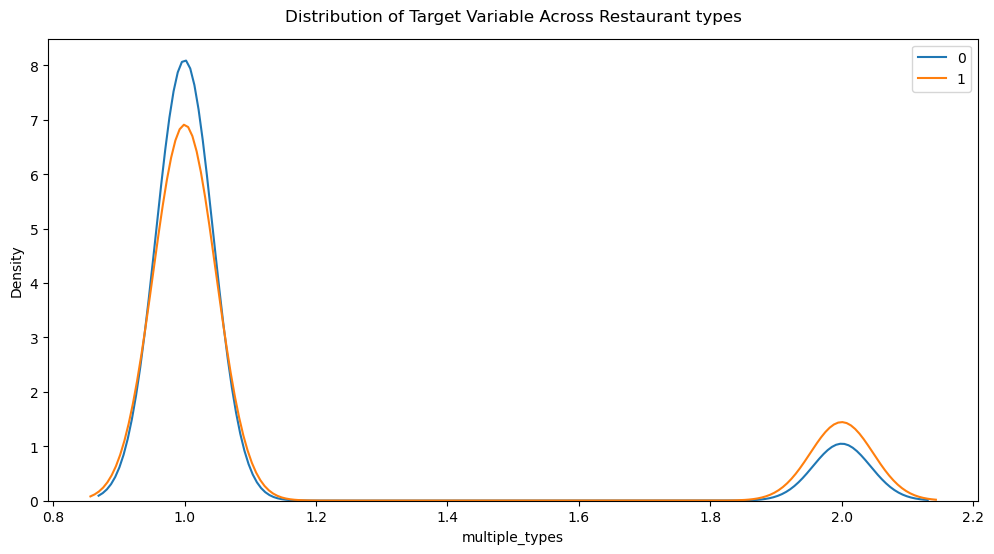

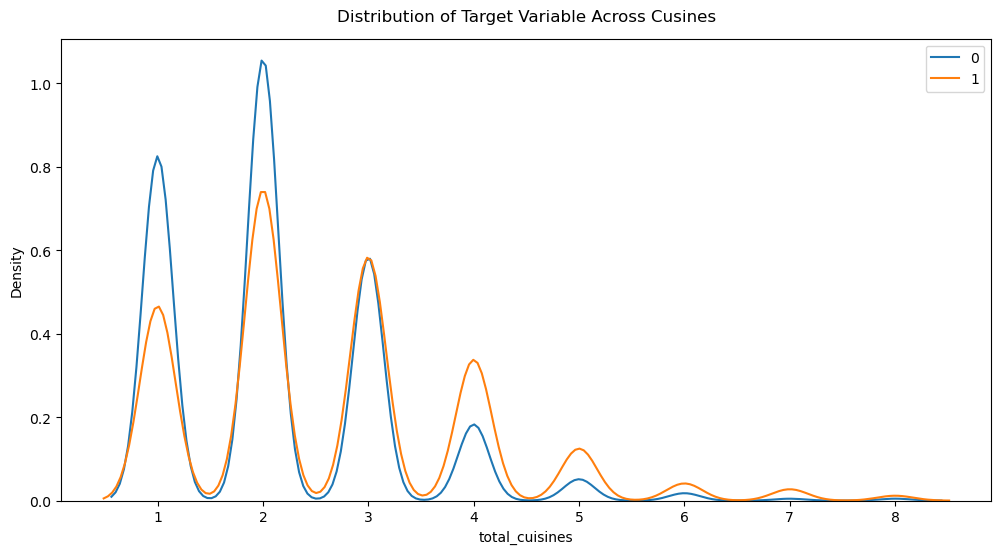

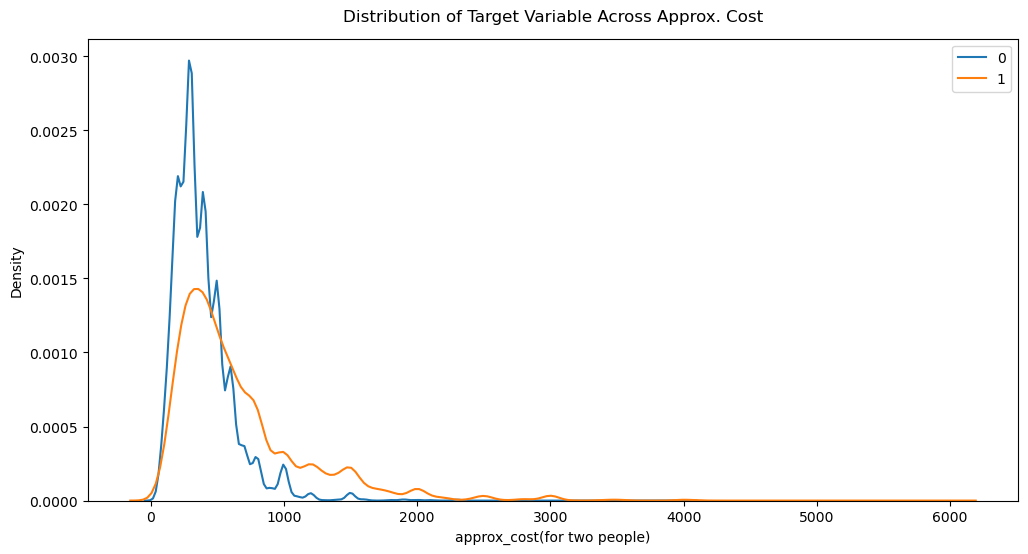

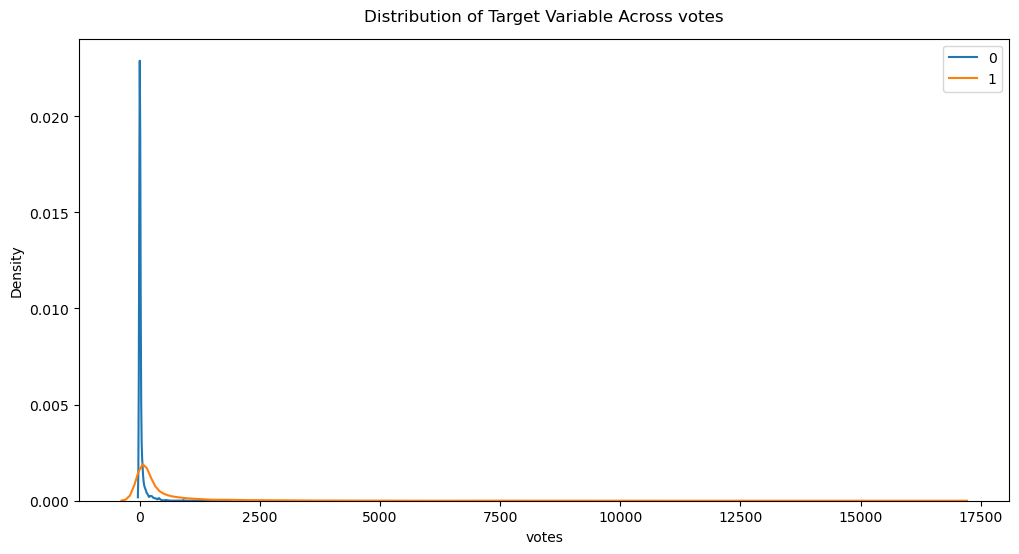

In [128]:
plt.figure(figsize=(12, 6))
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'] , hist=False , label='1')
plt.title('Distribution of Target Variable Across Restaurant types', y=1.02)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'] , hist=False , label='1')
plt.title('Distribution of Target Variable Across Cusines', y=1.02)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'] , hist=False , label='1')
plt.title('Distribution of Target Variable Across Approx. Cost', y=1.02)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(dataframe[dataframe['target']==0]['votes'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['votes'] , hist=False , label='1')
plt.title('Distribution of Target Variable Across votes', y=1.02)
plt.legend()
plt.show()

#### Selecting best features for encoding

In [135]:
dataframe = dataframe.dropna()

In [136]:
dataframe.isnull().sum()

index                          0
url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
target                         0
total_cuisines                 0
multiple_types                 0
dtype: int64

In [137]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'target', 'total_cuisines',
       'multiple_types'],
      dtype='object')

In [138]:
imp_features = ['online_order', 'book_table', 'votes',  'location', 'rest_type', 
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)', 'target']

data = dataframe[imp_features]

In [139]:
cat_features = [col for col in data.columns if data[col].dtype=='O']
num_features = [col for col in data.columns if data[col].dtype!='O']

In [ ]:
# one-hot encoding

In [140]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature , data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [141]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100
freq_cat

# top 10 categories have up to 80% of data points

rest_type
Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: count, dtype: float64

In [142]:
freq_cat.index
data['rest_type'].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 42144, dtype: bool

In [143]:
data['rest_type'] = data['rest_type'].apply(lambda x : 'other' if x not in freq_cat.index else x)
data['rest_type']

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [144]:
data['listed_in(city)'].value_counts()/len(data)*100

# top 10 categories do not have up to 80% of data points

listed_in(city)
BTM                      6.304575
Koramangala 7th Block    5.682897
Koramangala 5th Block    5.464598
Koramangala 4th Block    5.455106
Koramangala 6th Block    5.108675
Jayanagar                4.683941
JP Nagar                 4.002942
Indiranagar              3.734814
Church Street            3.673121
MG Road                  3.644647
Brigade Road             3.571090
Lavelle Road             3.485668
HSR                      3.246014
Residency Road           3.219913
Marathahalli             3.113136
Bannerghatta Road        2.987377
Whitefield               2.920938
Old Airport Road         2.821279
Brookefield              2.783314
Basavanagudi             2.565015
Kammanahalli             2.484339
Sarjapur Road            2.446374
Kalyan Nagar             2.432137
Bellandur                2.337225
Frazer Town              2.318242
Malleshwaram             2.242312
Electronic City          2.080961
Rajajinagar              2.078588
Banashankari             1.74402

In [145]:
data['location'].value_counts()/len(data)*100

# top 10 categories do not have up to 80% of data points

location
BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
Yelahanka                0.009491
West Bangalore           0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: count, Length: 92, dtype: float64

In [146]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [147]:
for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    col_encoded = pd.get_dummies(data[col] , prefix=col , drop_first=True)
    data = pd.concat([data , col_encoded] , axis=1)

In [148]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# mean encoding

In [149]:
mean_target_location = data.groupby('location')['target'].mean()
data['location_mean_target'] = data['location'].map(mean_target_location)


mean_target_listed_in_city = data.groupby('listed_in(city)')['target'].mean()
data['listed_in_city_mean_target'] = data['listed_in(city)'].map(mean_target_listed_in_city)

In [151]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars',
       'location_mean_target', 'listed_in_city_mean_target'],
      dtype='object')

In [152]:
data.drop(['online_order', 'book_table' , 'rest_type' , 'listed_in(type)',
           'location', 'listed_in(city)'] , axis=1 , inplace=True)

In [156]:
for col in data.select_dtypes(include='bool').columns:
    data[col] = data[col].replace({False: 0, True: 1})

In [157]:
data.head(3)

,votes,approx_cost(for two people),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_mean_target,listed_in_city_mean_target
0,775,800.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.708497,0.746939
1,787,800.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0.708497,0.746939
2,918,800.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0.708497,0.746939


## ...Handling Outliers...

In [154]:
num_features

['votes', 'approx_cost(for two people)', 'target']

In [ ]:
# Check the presence of outliers

In [161]:
import scipy.stats as stats

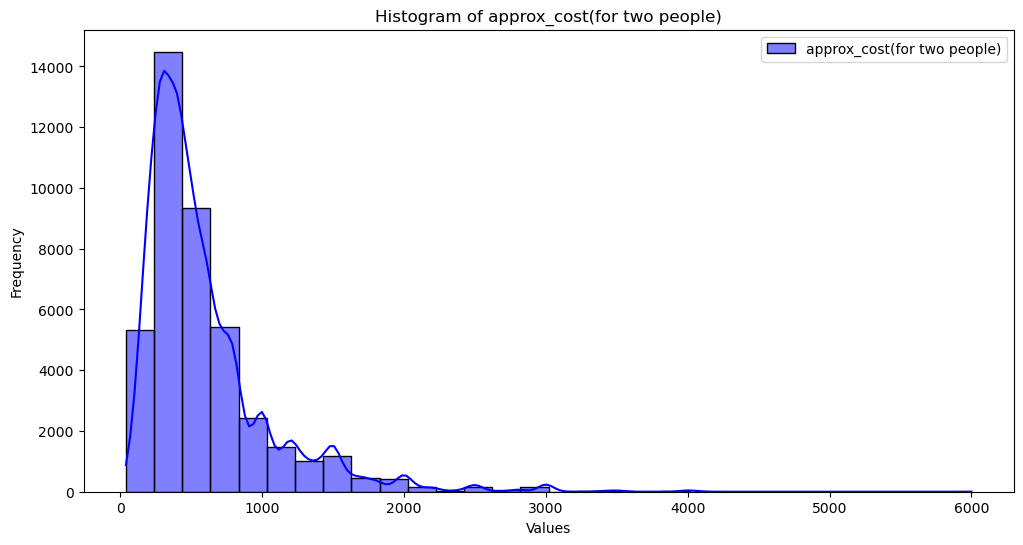

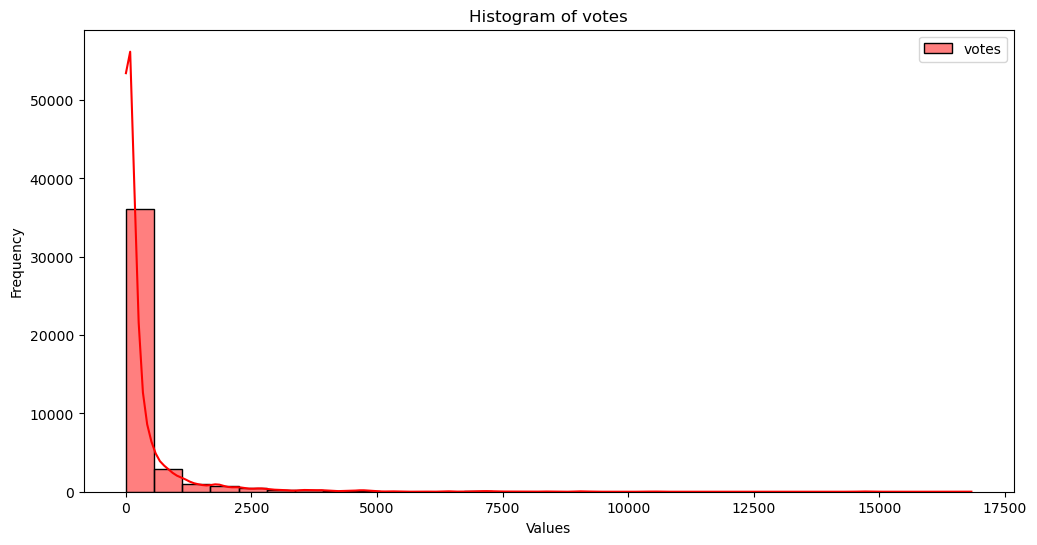

In [163]:
# Visualize skewed data
plt.figure(figsize=(12, 6))
sns.histplot(data['approx_cost(for two people)'], bins=30, kde=True, color='blue', label='approx_cost(for two people)')
plt.title('Histogram of approx_cost(for two people)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['votes'], bins=30, kde=True, color='red', label='votes')
plt.title('Histogram of votes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [165]:
from scipy.stats import skew

In [166]:
# Calculate skewness

skewness_cost = skew(data['approx_cost(for two people)'])
skewness_votes = skew(data['votes'])

print("Skewness of approx_cost(for two people):", skewness_cost)
print("Skewness of votes:", skewness_votes)

Skewness of approx_cost(for two people): 2.4452759240541537
Skewness of votes: 6.952288795372786


In [ ]:
# Transforming numerical features

In [167]:
transformed_cost = np.log1p(data['approx_cost(for two people)'])
transformed_votes = np.log1p(data['votes'])

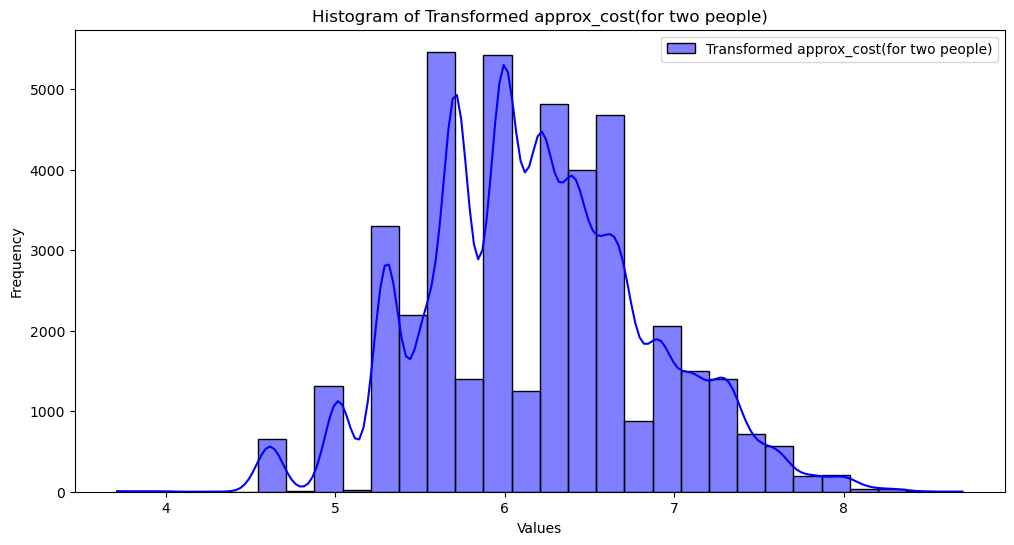

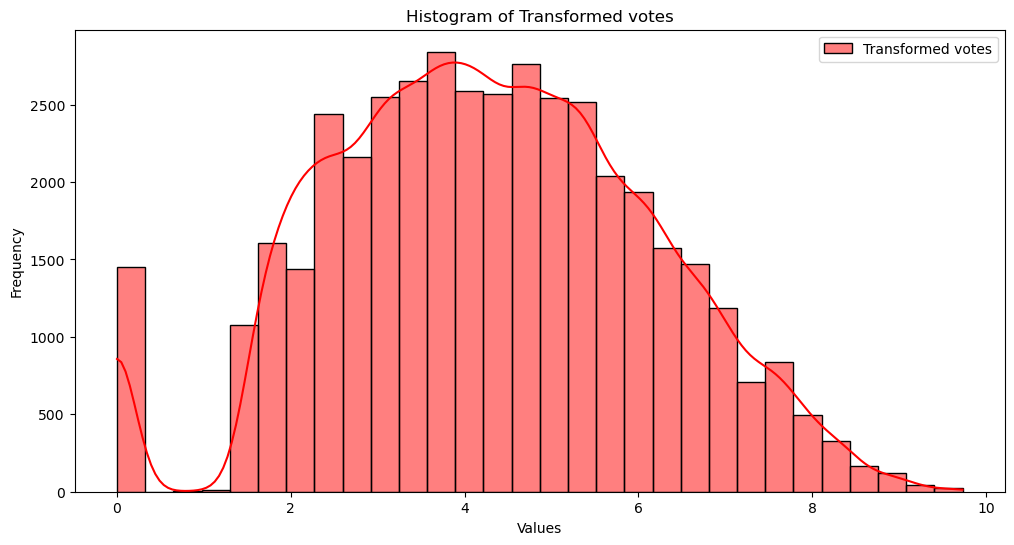

In [168]:
# Visualize transformed data
plt.figure(figsize=(12, 6))
sns.histplot(transformed_cost, bins=30, kde=True, color='blue', label='Transformed approx_cost(for two people)')
plt.title('Histogram of Transformed approx_cost(for two people)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(transformed_votes, bins=30, kde=True, color='red', label='Transformed votes')
plt.title('Histogram of Transformed votes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [169]:
# Calculate skewness for transformed data
skewness_transformed_cost = skew(transformed_cost)
skewness_transformed_votes = skew(transformed_votes)

print("Skewness of transformed approx_cost(for two people):", skewness_transformed_cost)
print("Skewness of transformed votes:", skewness_transformed_votes)

Skewness of transformed approx_cost(for two people): 0.21522136422313512
Skewness of transformed votes: -0.0002564378772128266


## ...Model Building...

In [171]:
data.dtypes

votes                                   int64
approx_cost(for two people)           float64
target                                  int64
online_order_Yes                        int64
book_table_Yes                          int64
rest_type_Casual Dining                 int64
rest_type_Delivery                      int64
rest_type_Dessert Parlor                int64
rest_type_Quick Bites                   int64
rest_type_other                         int64
listed_in(type)_Cafes                   int64
listed_in(type)_Delivery                int64
listed_in(type)_Desserts                int64
listed_in(type)_Dine-out                int64
listed_in(type)_Drinks & nightlife      int64
listed_in(type)_Pubs and bars           int64
location_mean_target                  float64
listed_in_city_mean_target            float64
dtype: object

In [172]:
data.head(3)

,votes,approx_cost(for two people),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_mean_target,listed_in_city_mean_target
0,775,800.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.708497,0.746939
1,787,800.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0.708497,0.746939
2,918,800.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0.708497,0.746939


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [174]:
X = data.drop('target', axis=1)  # Features
y = data['target'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [175]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8926537585421412
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      2896
           1       0.91      0.95      0.93      7640

    accuracy                           0.89     10536
   macro avg       0.88      0.85      0.86     10536
weighted avg       0.89      0.89      0.89     10536

Confusion Matrix:
 [[2164  732]
 [ 399 7241]]
